# Fredo

In [15]:
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
df = pd.read_csv('./Dataset/ML_cars.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## EDA

In [ ]:
df.isna().sum()

In [ ]:
df.dtypes


In [ ]:
df.shape

### Eliminando columnas no aptas para el analisis: 

##### a. car_ID | b. CarName | d. carlength, carwidth, carheight = vehicule_volume

In [38]:
df = df.drop(['car_ID', 'CarName'], axis=1)
df['vehicule_volume'] = df['carlength'] * df['carwidth'] * df['carheight']
df = df.drop(['carlength', 'carwidth', 'carheight'], axis=1)
df.head(3)


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,vehicule_volume
0,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904
1,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904
2,1,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,587592.640


Viendo las columnas con tipo de dato objeto:
Esto es para observar los valores unicos que contienen las variables categoricas

In [39]:
for col in df.columns:
    if df[col].dtypes == 'object':
        print(col + ": " + str(df[col].unique()))



fueltype: ['gas' 'diesel']
aspiration: ['std' 'turbo']
doornumber: ['two' 'four']
carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel: ['rwd' 'fwd' '4wd']
enginelocation: ['front' 'rear']
enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


Aqui observamos como se encuentra distribuida nuestra variables objetivo

In [ ]:
df.price.hist(bins=30)

In [ ]:
df[df.price> 36000]

Primera Prueba de pairplots 

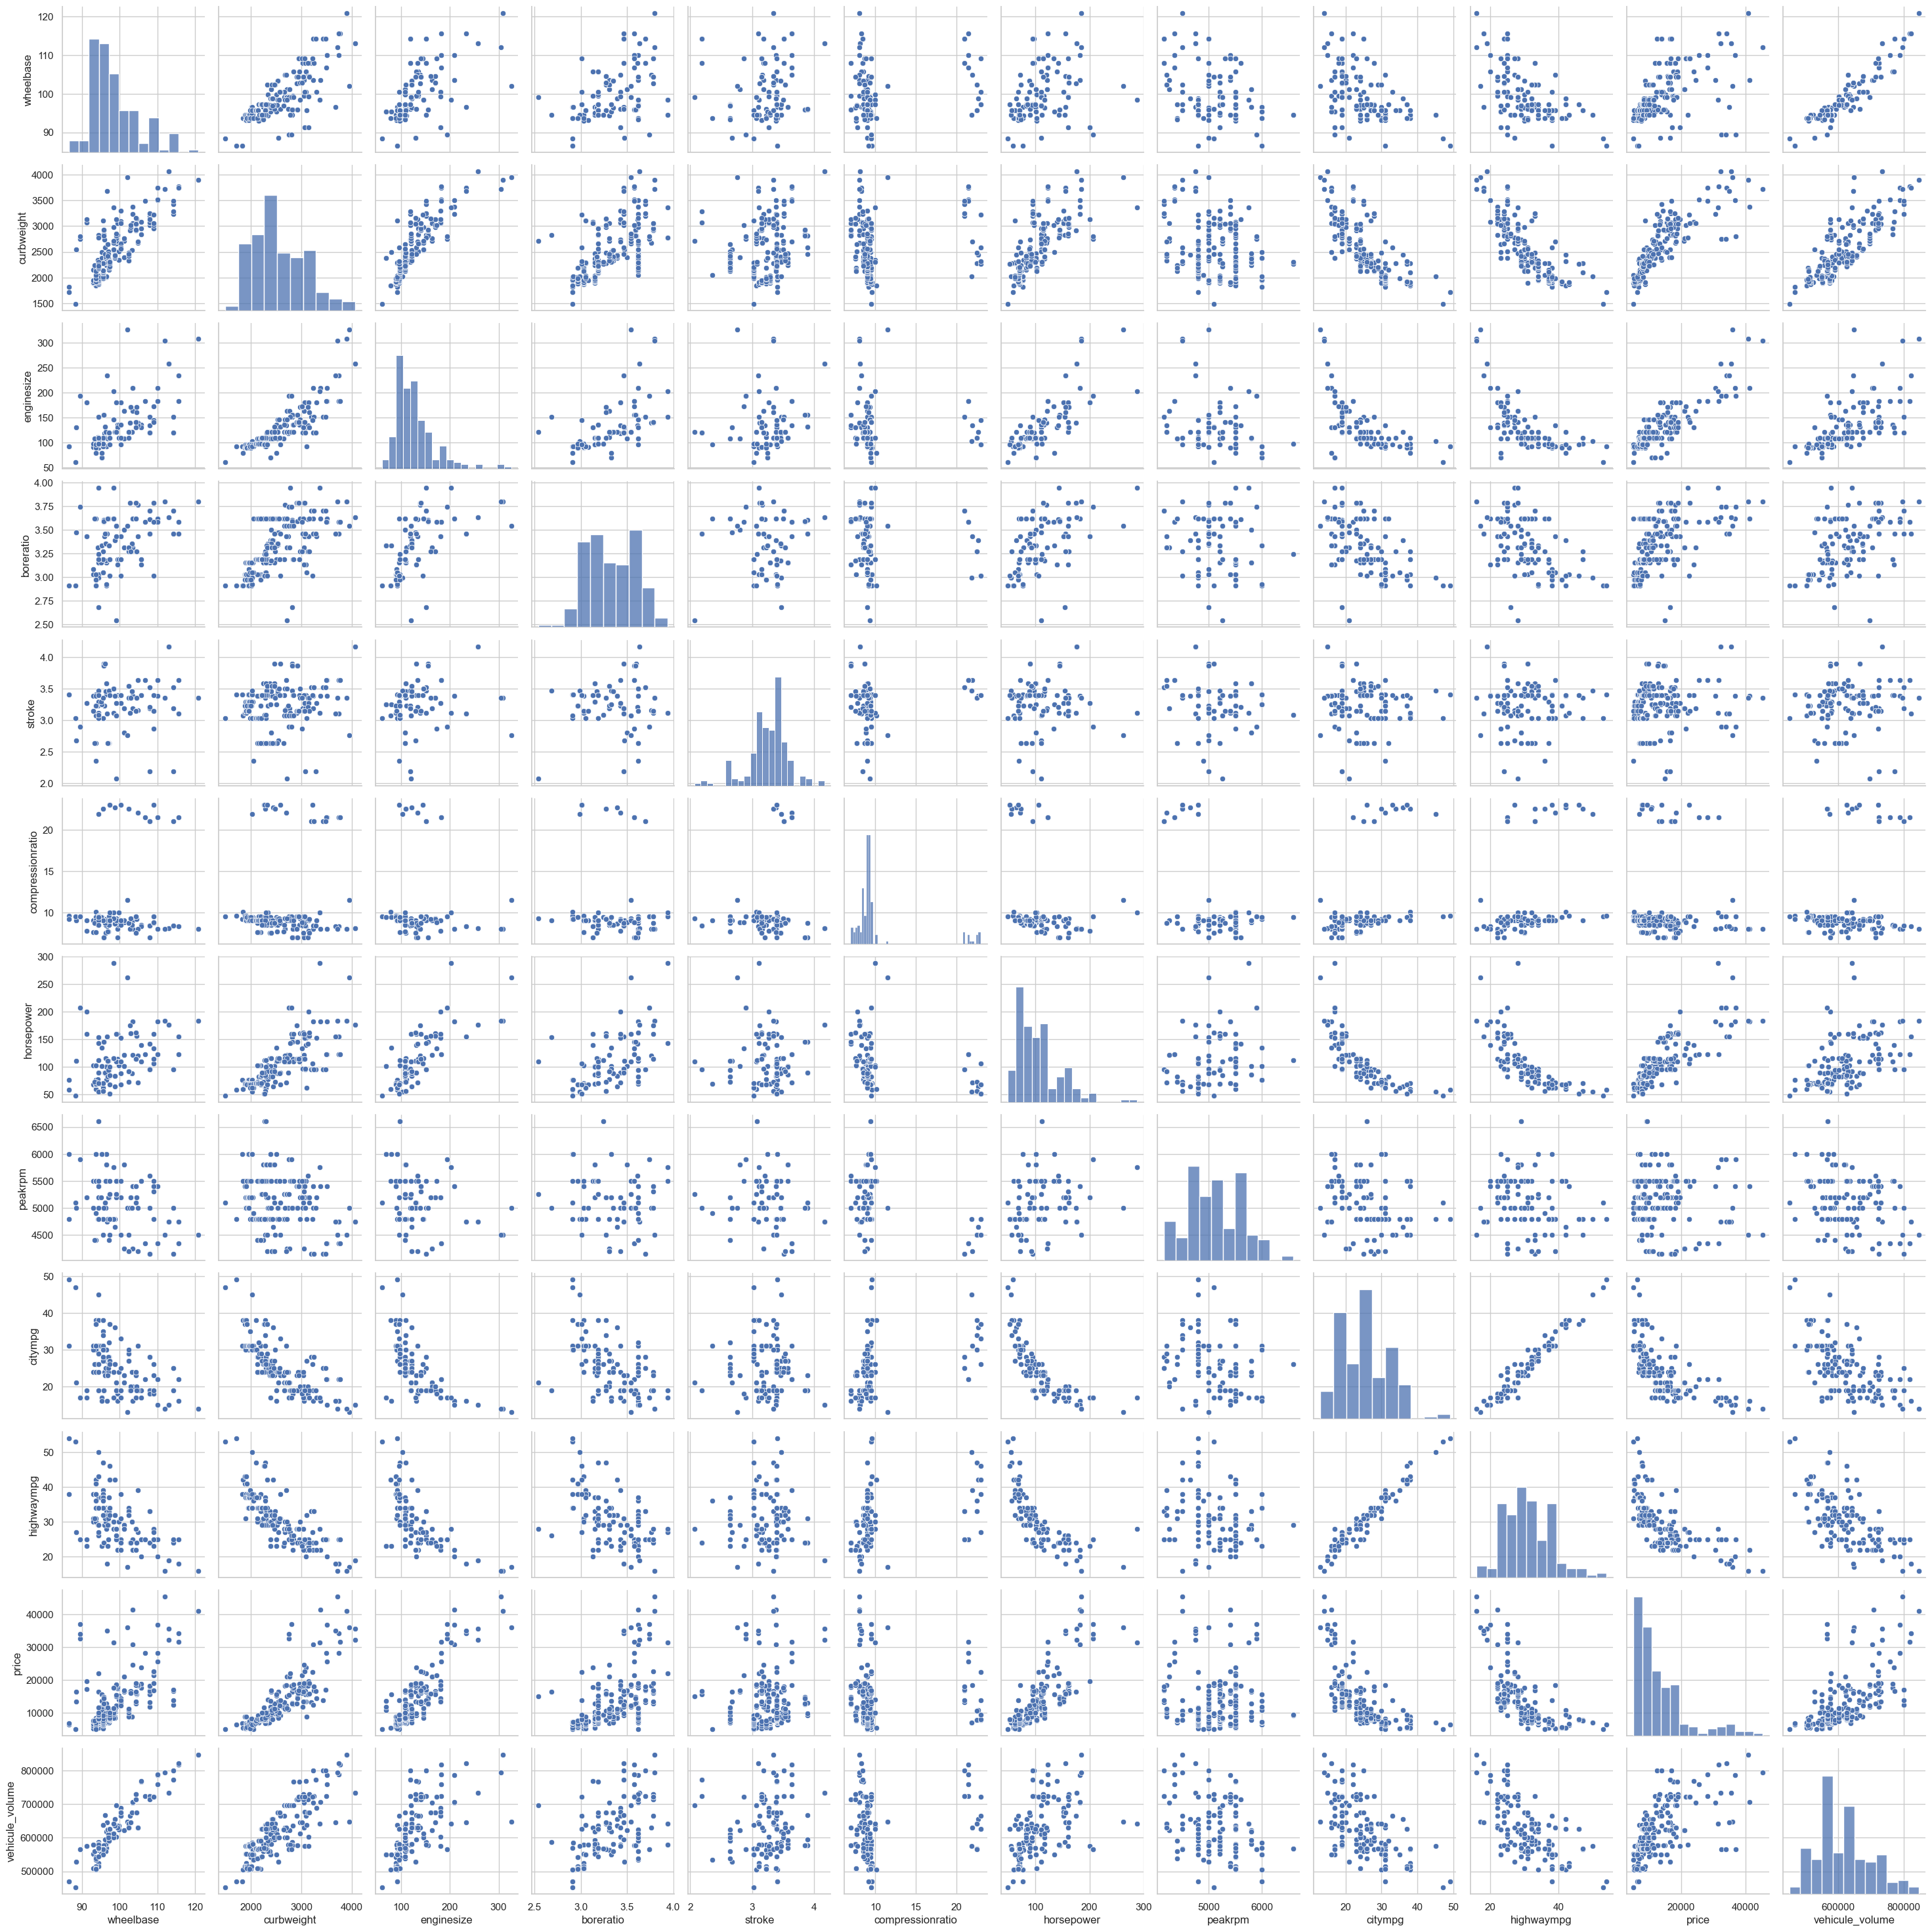

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style= 'whitegrid' , context='notebook')

exclude_cols = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem', 'symboling']
df_subset = df.drop(exclude_cols, axis=1)
sns.pairplot(df_subset, height = 2.5)

plt.show()

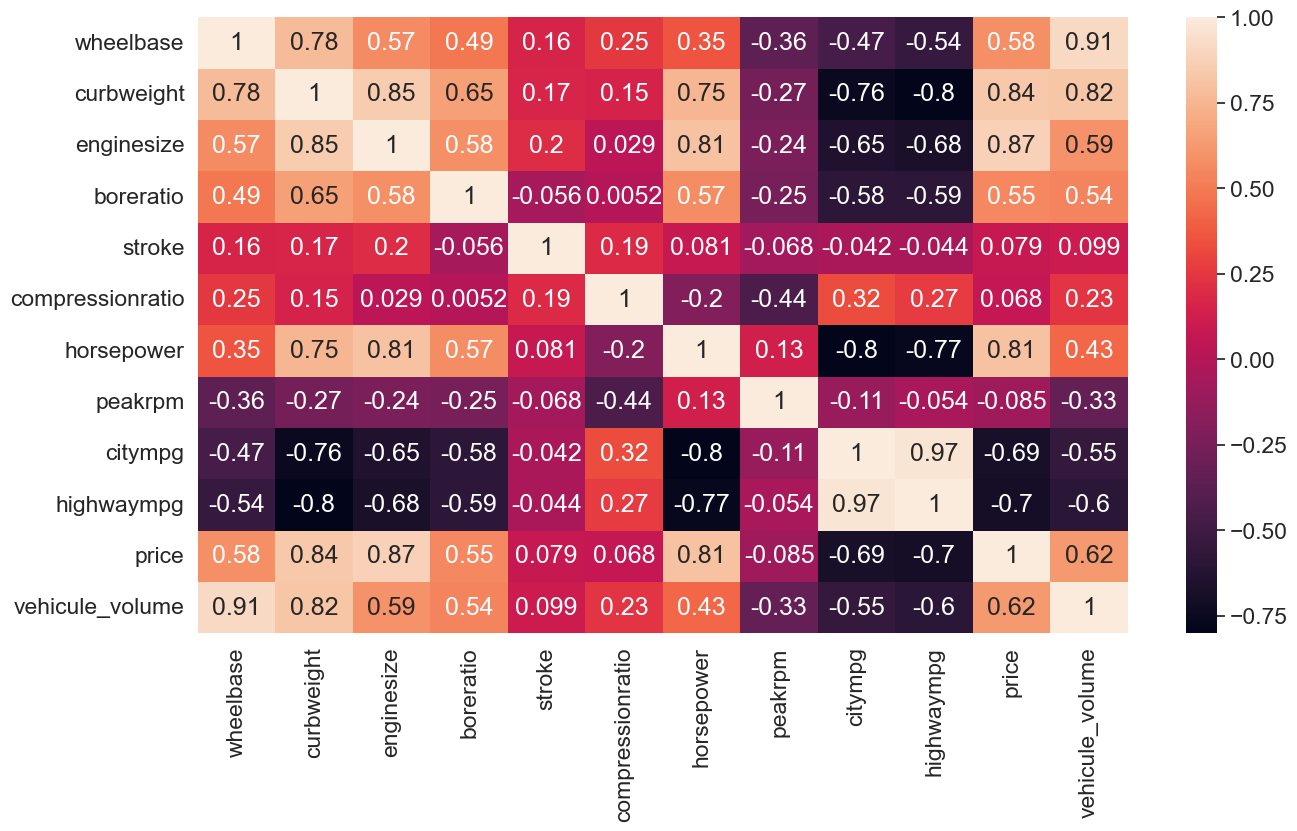

In [45]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15, 8))  # Aumentar el tamaño de la figura
sns.heatmap(df_subset.corr(), cbar=True, annot=True);

De este grafico se puede observar multicolinealidad: 

Por ejemplo entre Citympg y highwaympg

In [ ]:
import seaborn as sns
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd

# Cargar los datos en un DataFrame de pandas (en este caso usamos dataset boston)
boston_data = load_boston()
boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

# Crear un gráfico de correlación utilizando pairplot
sns.pairplot(boston)

# Mostrar el gráfico
plt.show()

Pruebas para el modelo 
Aun no esta listo

In [7]:
!pip install regressors

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      error in regressors setup command: use_2to3 is invalid.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [8]:
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid', context='notebook')